<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [20]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the Netflix CSV as a DataFrame
df = pd.read_csv("netflix_data.csv")

In [21]:
# Arrange data in columns
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['duration'] = df['duration'].astype(float)

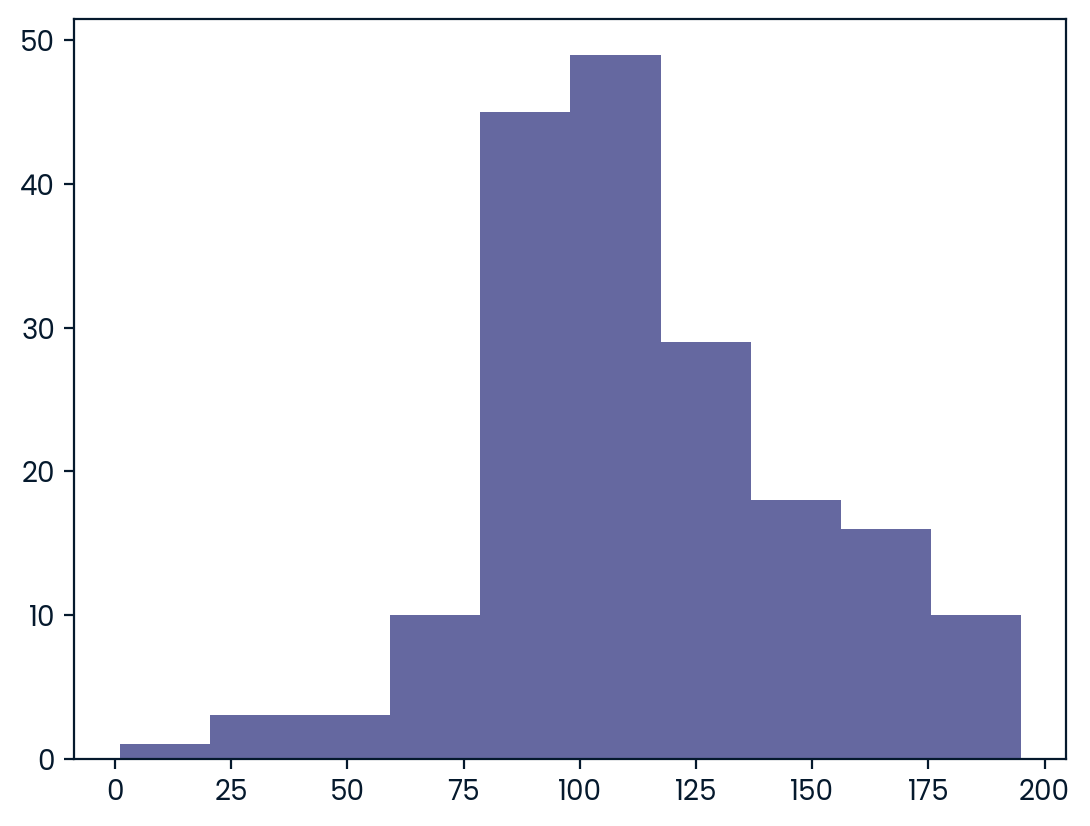

In [22]:
deceny = df[df['release_year'] >= 1990]
deceny =  deceny[deceny['release_year'] < 2000]
plt.hist(deceny['duration'])
duration = 110

In [23]:
deceny = deceny[deceny['genre'] == 'Action']
short_movie_count = 0
for index, movie in deceny.iterrows():
    if movie['duration'] < 90:
        short_movie_count = short_movie_count + 1
short_movie_count

7

In [24]:
# Number of genres and type
unique_genres = df['genre'].dropna().unique()
unique_types = df['type'].dropna().unique()
print(f"Total shows : {len(df)}")
print(f"Genres represented ({len(unique_genres)}): {list(unique_genres)}")
print(f"Types represented ({len(unique_types)}): {list(unique_types)}")
print(f"Today, the full duration on platform {sum(df['duration'])} min, it represents {sum(df['duration']) / 60} hours or {sum(df['duration']) / (60 * 24)} days !")

Total shows : 4812
Genres represented (31): ['Dramas', 'Horror Movies', 'Action', 'International TV', 'Documentaries', 'Independent Movies', 'Comedies', 'Sci-Fi', 'International Movies', 'Children', 'TV Shows', 'Uncategorized', 'Classic Movies', 'Thrillers', 'Stand-Up', 'Anime Features', 'Music', 'Anime Series', 'Kids', 'Docuseries', 'Crime TV', 'British TV', 'Cult Movies', 'TV Action', 'Romantic TV', 'TV Horror', 'Romantic Movies', 'TV Comedies', 'Classic', 'Reality TV', 'LGBTQ Movies']
Types represented (2): ['Movie', 'TV Show']
Today, the full duration on platform 479115.0 min, it represents 7985.25 hours or 332.71875 days !


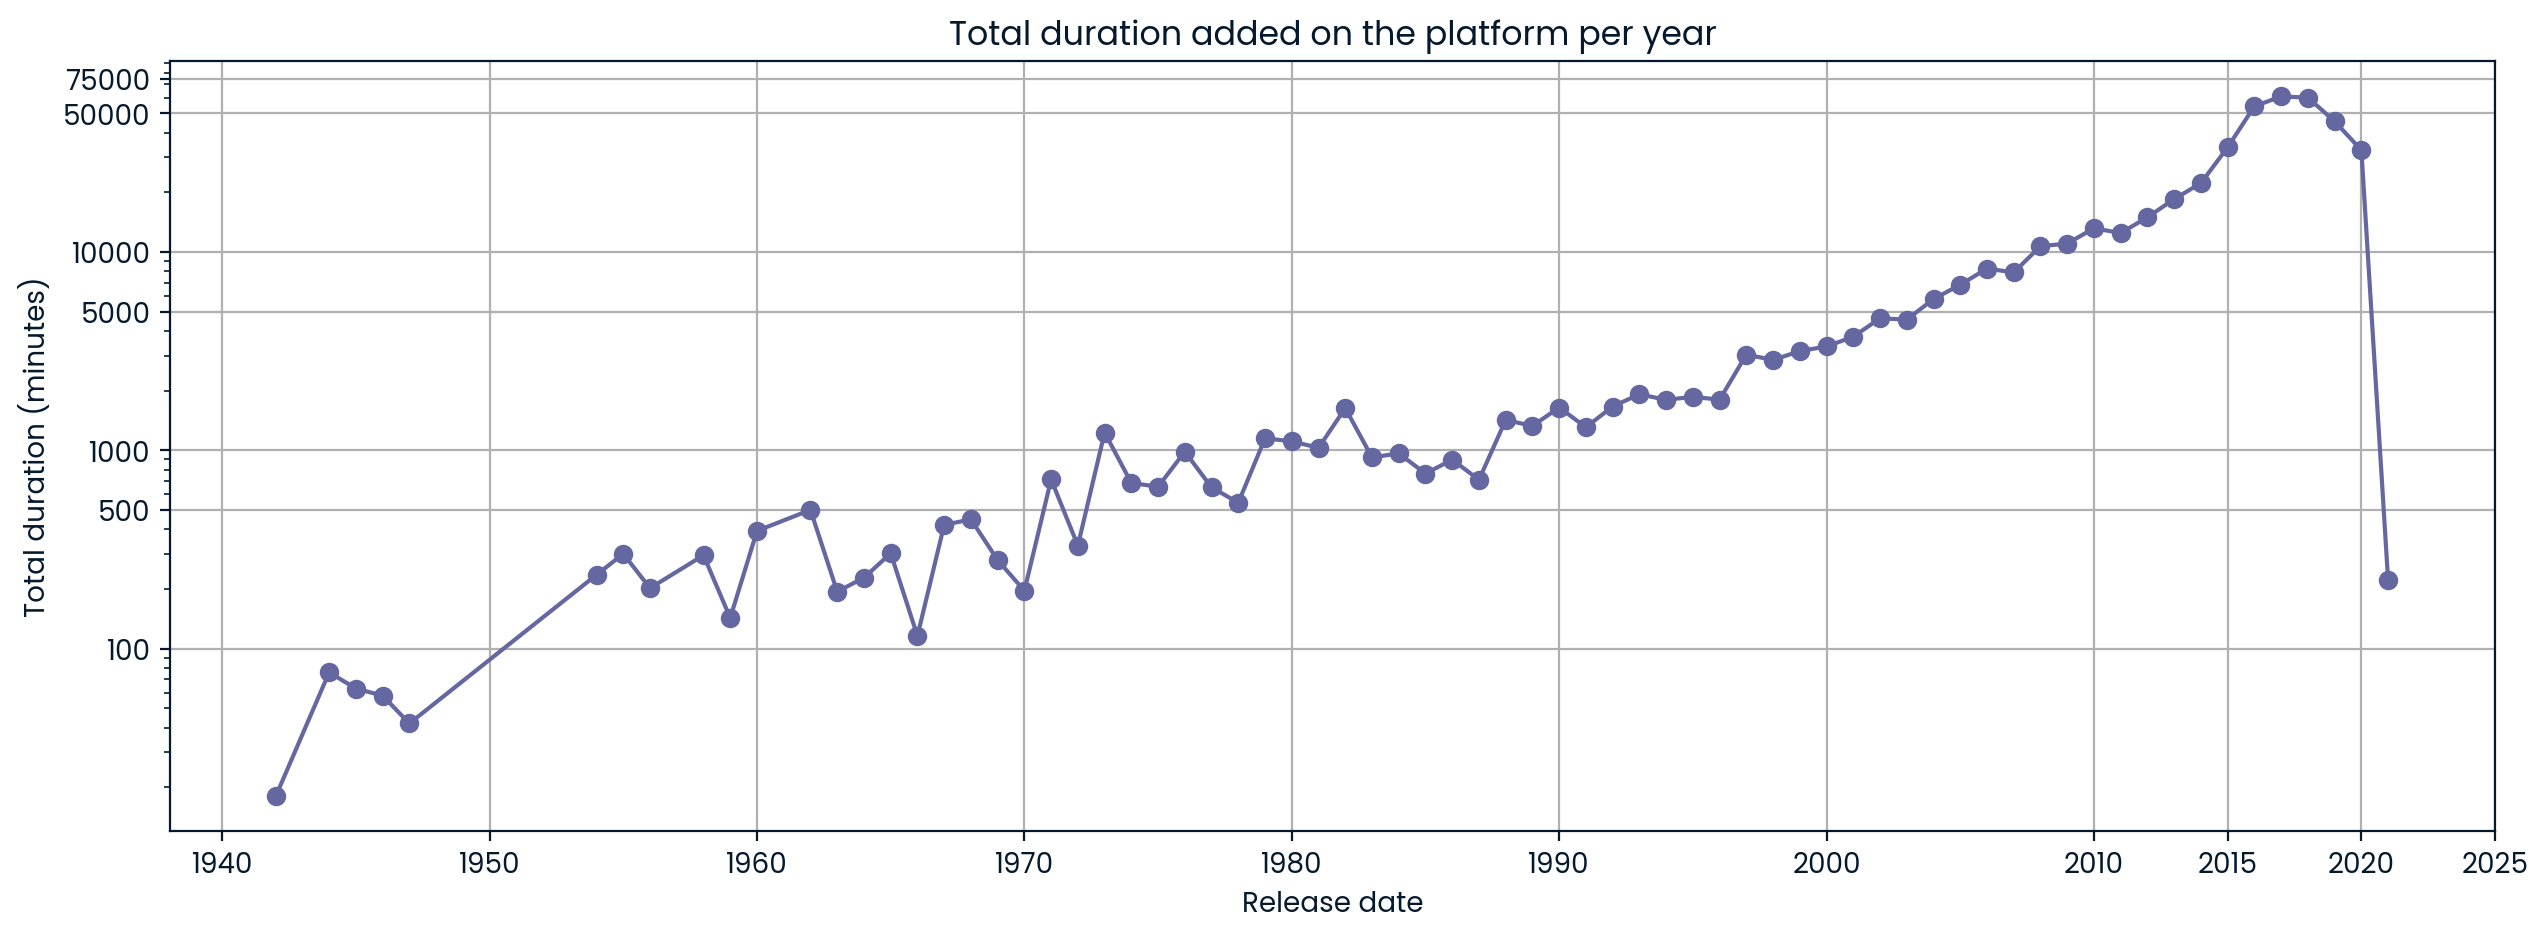

In [25]:
# Duration per year
duration_per_year = df.groupby('release_year')['duration'].sum()
plt.figure(figsize=(15, 5))
plt.plot(duration_per_year.index, duration_per_year.values, marker='o')
plt.xlabel("Release date")
plt.ylabel("Total duration (minutes)")
plt.yscale('log')
plt.yticks([100, 500, 1000, 5000, 10000, 50000, 75000], ['100', '500', '1000', '5000', '10000', '50000', '75000'])
plt.xticks([1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015, 2020, 2025], ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2015', '2020', '2025'])
plt.title("Total duration added on the platform per year")
plt.grid()
plt.show()

<Figure size 1500x500 with 0 Axes>

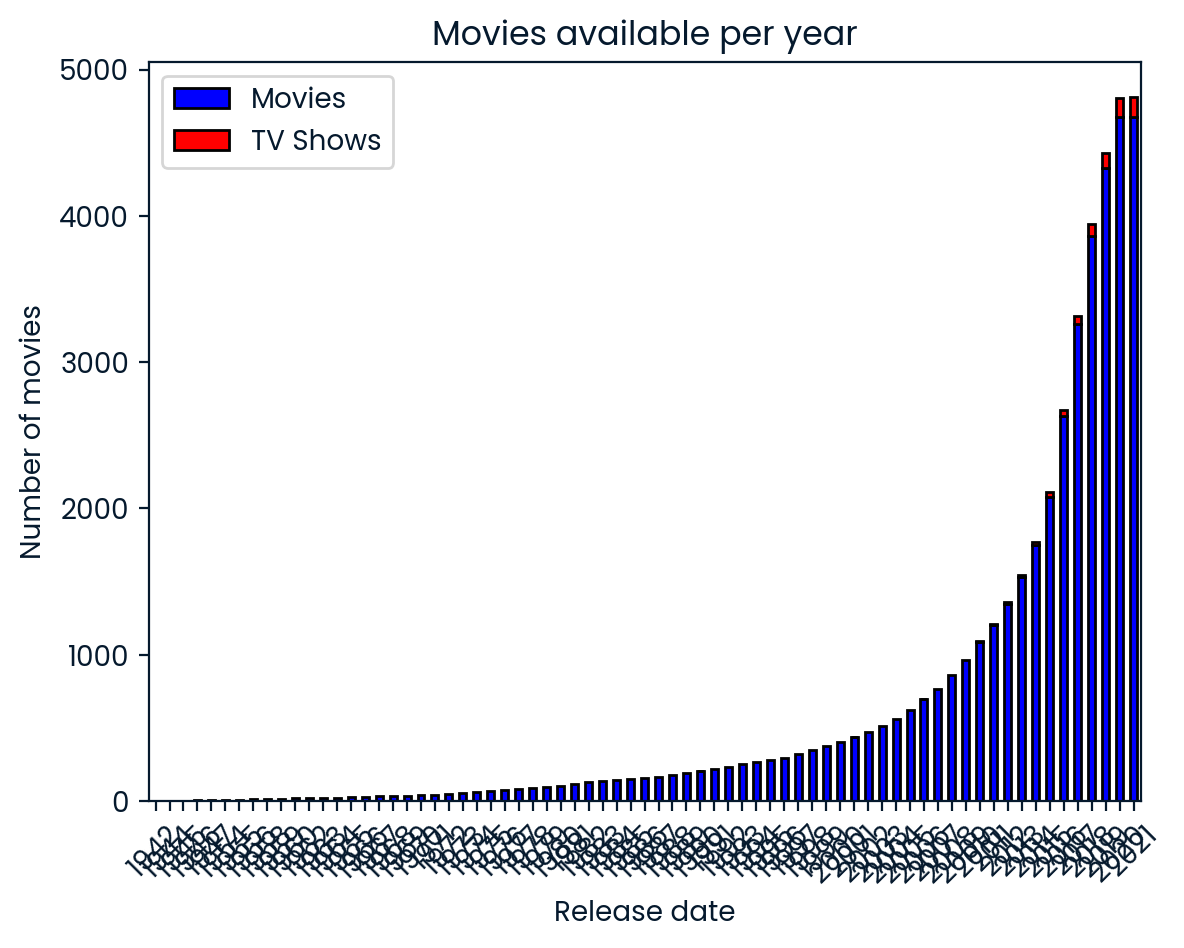

In [26]:
movies_per_year = df[df['type'] == 'Movie'].groupby('release_year').size().cumsum()  # Sum of films per year
tv_shows_per_year = df[df['type'] == 'TV Show'].groupby('release_year').size().cumsum()  # Sum of TV series per year

combined = pd.DataFrame({'Movies': movies_per_year, 'TV Shows': tv_shows_per_year}).fillna(0)

plt.figure(figsize=(15, 5))
combined.plot(kind='bar', stacked=True, color=['blue', 'red'], edgecolor='black')

plt.xlabel("Release date")
plt.xticks(rotation=45)
plt.ylabel("Number of movies")
plt.title("Movies available per year")
plt.show()

<Figure size 1500x500 with 0 Axes>

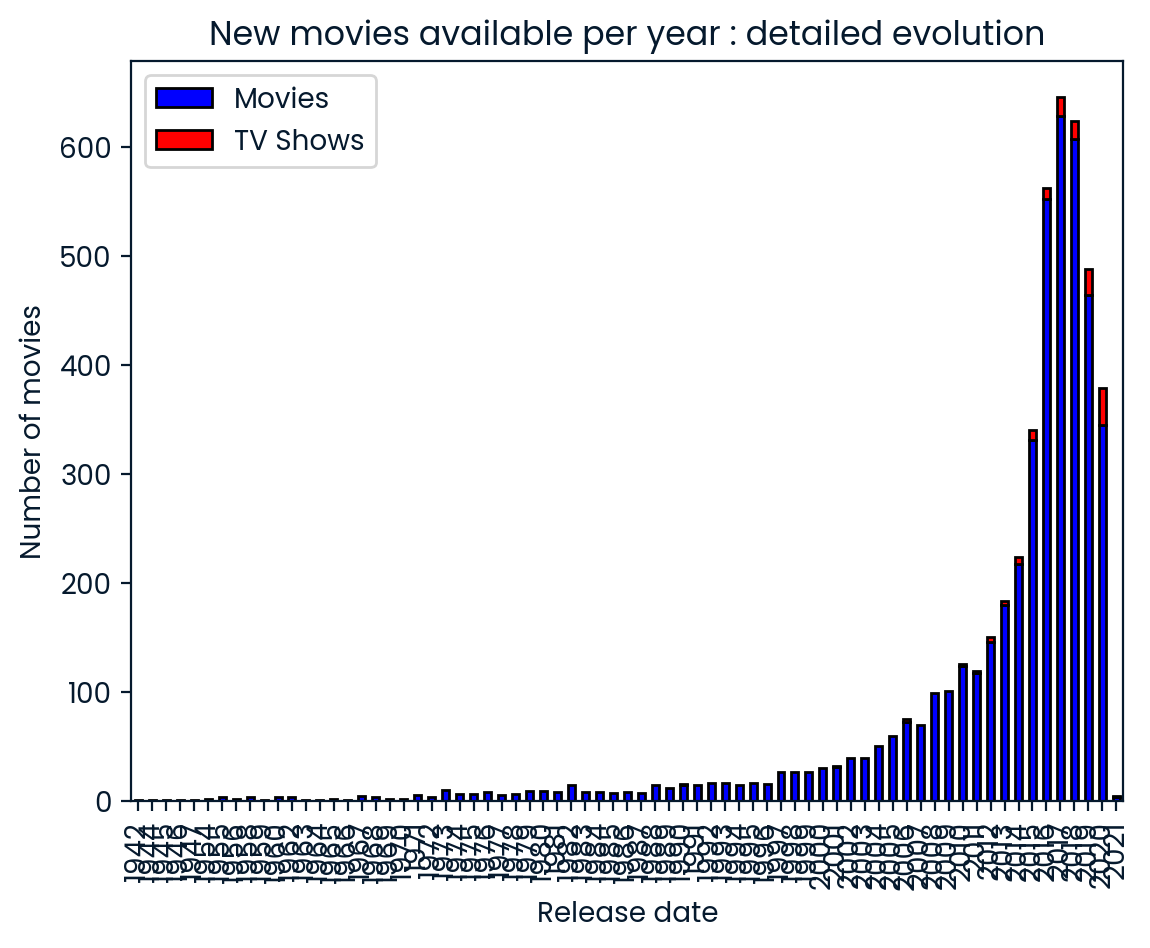

In [27]:
# Films per year : details

movies_per_year = df[df['type'] == 'Movie'].groupby('release_year').size()
tv_shows_per_year = df[df['type'] == 'TV Show'].groupby('release_year').size()
combined = pd.DataFrame({'Movies': movies_per_year, 'TV Shows': tv_shows_per_year}).fillna(0)
plt.figure(figsize=(15, 5))
combined.plot(kind='bar', stacked=True, color=['blue', 'red'], edgecolor='black')
# plt.hist(df[df['type'] == 'Movie']['release_year'].dropna(), bins=30, edgecolor='black', alpha=0.7, label='Movies', color='blue')
# plt.hist(df[df['type'] == 'TV Show']['release_year'].dropna(), bins=11, edgecolor='black', alpha=0.7, label='TV Shows', color='red')

plt.xlabel("Release date")
plt.ylabel("Number of movies")
plt.title("New movies available per year : detailed evolution")
plt.show()

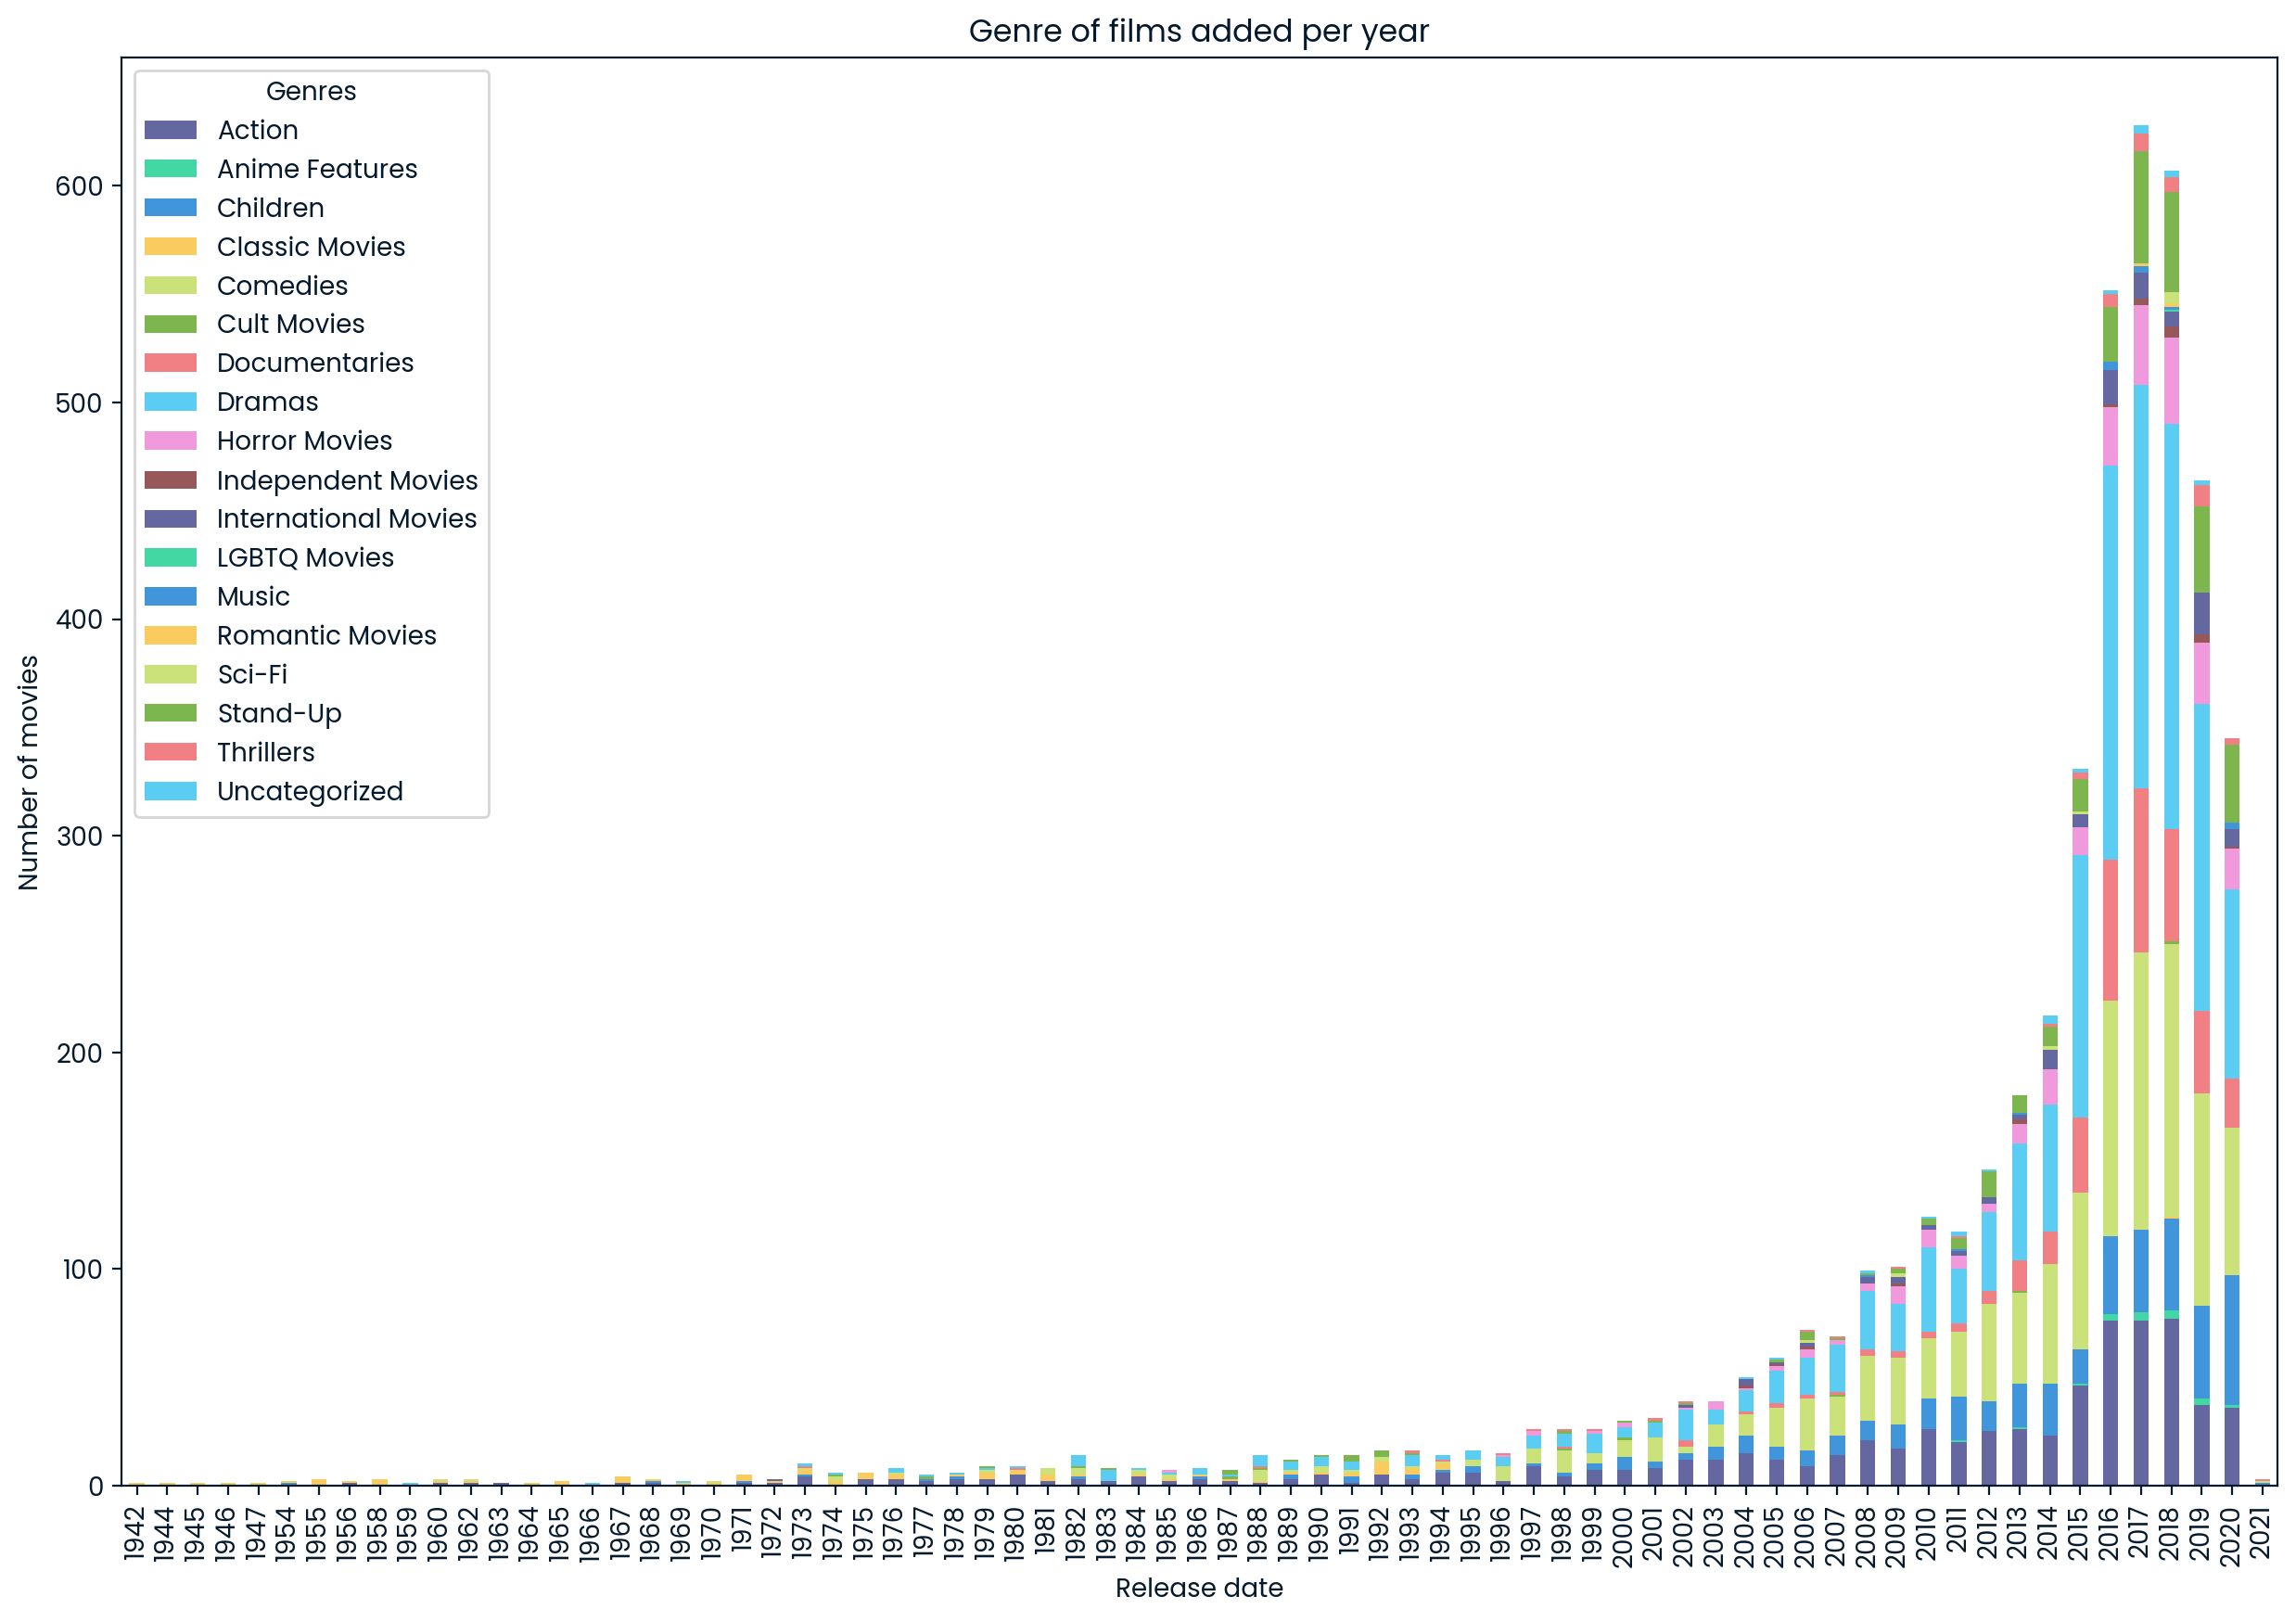

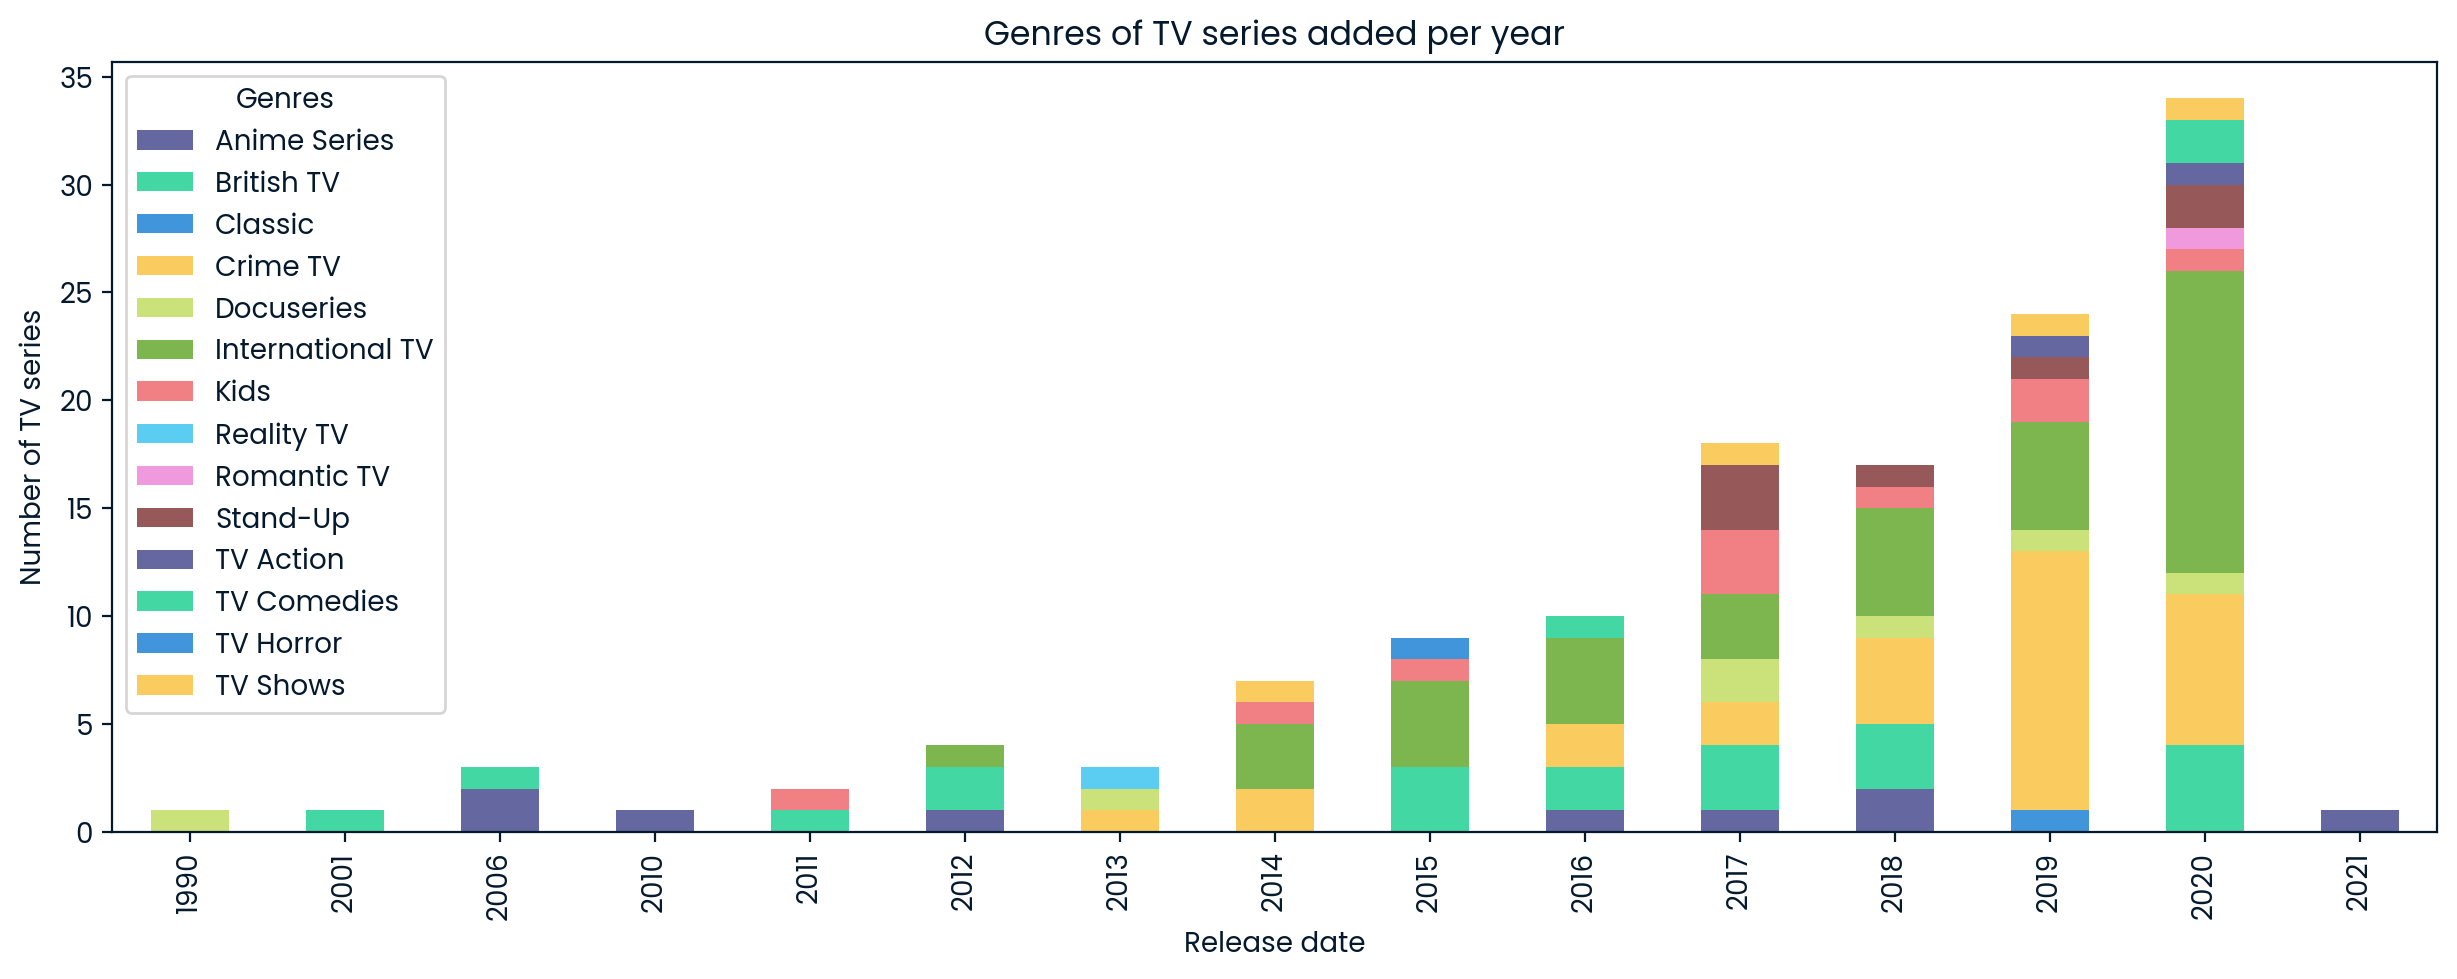

In [28]:
# Genre per year                                                                                        
df_genres = df.explode('genre')
movies_genres = df_genres[df_genres['type'] == 'Movie'].groupby(['release_year', 'genre']).size().unstack(fill_value=0)
tvshows_genres = df_genres[df_genres['type'] == 'TV Show'].groupby(['release_year', 'genre']).size().unstack(fill_value=0)

movies_genres.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.xlabel("Release date")
plt.ylabel("Number of movies")
plt.title("Genre of films added per year")
plt.legend(title="Genres")

tvshows_genres.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.xlabel("Release date")
plt.ylabel("Number of TV series")
plt.title("Genres of TV series added per year")
plt.legend(title="Genres")
plt.show()

In [29]:
def group_year_films(year):
    if year <= 1961:
        return '<1960'
    elif year < 2000:
        return ((year // 20) * 20 ) + 20
    elif year < 2010:
        return ((year // 10) * 10 ) + 10
    elif year <= 2015:
        return ((year // 5) * 5) + 5
    else:
        return ((year // 2) * 2) + 2


def group_year_tv(year):
    if year < 1990:
        return (year // 10) * 10 
    elif year <= 2015:
        return (year // 5) * 5
    else:
        return (year // 2) * 2

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
pd.set_option('display.max_rows', None) 
    
df_movies = df_genres[df_genres['type'] == 'Movie']
print(f"Total number of movies : {len(df_movies)}")
print(f"Average duration of movies : {sum(df_movies['duration']) / len(df_movies)} minutes")
df_movies['year_group'] = df_movies['release_year'].dropna().apply(group_year_films)

df_tv = df_genres[df_genres['type'] == 'TV Show']
print(f"Total number of TV series : {len(df_tv)}\n")
print(f"Average duration of TV series : {sum(df_tv['duration']) / len(df_tv)} minutes")
df_tv['year_group'] = df_tv['release_year'].dropna().apply(group_year_tv)

movies_genres = df_movies.groupby(['year_group', 'genre']).size().unstack(fill_value=0).T
tvshows_genres = df_tv.groupby(['year_group', 'genre']).size().unstack(fill_value=0).T
tvshows_genres['Total'] = tvshows_genres.sum(axis=1)
tvshows_genres.loc['All genres'] = tvshows_genres.sum()

movies_genres = movies_genres.reindex(columns=['<1960'] + [col for col in movies_genres.columns if col != '<1960'] )
movies_genres['Total'] = movies_genres.sum(axis=1)
movies_genres.loc['All genres'] = movies_genres.sum()

print("Genre of films added per year:")
display(movies_genres)

print("\nGenre of TV series added per year:")
display(tvshows_genres)

Total number of movies : 4677
Average duration of movies : 102.3846482788112 minutes
Total number of TV series : 135

Average duration of TV series : 1.9407407407407407 minutes
Genre of films added per year:


year_group,<1960,1980,2000,2010,2015,2018,2020,2022,Total
genre,,,,,,,,,
Action,2,24,75,127,120,152,160,36,696
Anime Features,0,0,0,0,2,7,8,1,18
Children,1,5,19,68,92,74,101,61,421
Classic Movies,14,27,27,0,0,0,1,0,69
Comedies,1,7,56,163,200,237,296,69,1029
Cult Movies,0,2,5,2,1,0,1,0,11
Documentaries,0,1,4,15,42,141,125,24,352
Dramas,1,9,69,146,213,368,450,87,1343
Horror Movies,0,0,5,27,43,64,81,19,239



Genre of TV series added per year:


year_group,1990,2000,2005,2010,2015,2016,2018,2020,Total
genre,,,,,,,,,
Anime Series,0,0,2,2,0,2,2,1,9
British TV,0,1,1,3,3,5,3,4,20
Classic,0,0,0,0,0,0,1,0,1
Crime TV,0,0,0,3,0,4,16,7,30
Docuseries,1,0,0,1,0,2,2,1,7
International TV,0,0,0,4,4,7,10,14,39
Kids,0,0,0,2,1,3,3,1,10
Reality TV,0,0,0,1,0,0,0,0,1
Romantic TV,0,0,0,0,0,0,0,1,1


In [30]:
# Countries
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of shows']
print(country_counts.head(10))


          Country  Number of shows
0   United States             1886
1           India              864
2  United Kingdom              311
3          Canada              155
4          France              133
5           Spain              112
6           Egypt               91
7          Turkey               81
8           Japan               81
9     Philippines               74


In [31]:
# Difference between creation year and adding year
netflix_creation_year = 1997
df = df[df['release_year'] >= netflix_creation_year]

In [32]:
# 5 first directors et 10 first actors, TODO : by type and genre
def top_entities(column, top_n=5):
    exploded = df.explode(column)
    return exploded[column].value_counts().head(top_n)

top_directors = top_entities('director', 5)
top_actors = top_entities('cast', 10)
print("Top 5 Directors:")
print(top_directors)
print("\nTop 10 Actors:")
print(top_actors)

Top 5 Directors:
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: director, dtype: int64

Top 10 Actors:
Samuel West           10
Jeff Dunham            7
Kevin Hart             6
Bill Burr              5
Jim Gaffigan           5
Jerry Seinfeld         4
David Attenborough     4
Tom Segura             4
Vir Das                4
Jay O. Sanders         4
Name: cast, dtype: int64
